<a href="https://colab.research.google.com/github/vihaveman/Breaking_Barriers/blob/Jibek/Breaking_barriers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
# Import the required libraries and dependencies
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [168]:
import pandas as pd
# Replace the file path with the correct location of the CSV file on your system
file_path = "/content/World_Bank.csv"
# Read the CSV file into a Pandas DataFrame and set the index to "Country Name"
df_technology_raw = pd.read_csv(file_path, index_col='Country Name')
# Review the DataFrame by displaying a random sample of 10 rows
df_technology_raw.sample(10)


,Country Code,Year,ATM Usage,GDP,High Tech Export ($M),High Tech Import,Internet Subscription Per 100,Internet Usage Per 100,IP Income($M),Labour Force (M),Med_High Tech Manufacturing,Mobile Sub Per 100,Personal Remittance ($M),Population Living In Slums,Poverty Count,Stock Traded $B,Tech Cooperation Grant($M),Unemployment Rate,Med High Tech Export
Country Name,,,,,,,,,,,,,,,,,,,
Pakistan,PAK,2011,4.28,0.60,324.88,37.87,0.59,8.00,90.00,60.26,23.99,54.83,9690.00,32.61,36.30,6.58,237.38,0.65,10.94
Nigeria,NGA,2018,16.33,-0.59,41.63,24.58,0.04,38.70,252.84,62.42,33.44,87.07,22037.02,51.49,40.10,0.59,346.43,4.73,53.61
Turkiye,TUR,2017,81.23,6.10,4068.85,44.45,14.53,64.68,1624.00,31.86,30.82,94.77,1186.00,6.99,13.90,32.40,186.61,10.84,45.54
Colombia,COL,2015,40.97,1.99,823.79,34.54,11.73,55.90,1282.43,24.25,22.54,121.66,4165.73,6.29,7.11,4.52,137.01,8.57,45.98
Turkiye,TUR,2012,60.25,3.25,2327.20,23.21,10.45,45.13,816.00,26.96,29.89,89.91,1883.00,16.22,15.00,43.05,151.07,8.80,40.30
Tunisia,TUN,2019,30.72,0.61,840.51,23.66,9.91,66.70,16.57,4.20,27.57,122.59,1902.29,4.85,3.25,1.05,211.73,15.46,51.64
Namibia,NAM,2015,56.70,2.45,6.26,59.55,3.08,25.69,6.94,0.87,7.35,111.70,80.72,18.89,17.40,0.56,38.38,18.52,7.19
Namibia,NAM,2013,49.61,3.84,72.29,67.70,1.62,13.90,8.45,0.79,7.29,123.74,80.11,18.89,1.58,0.46,49.66,16.77,25.75
Panama,PAN,2013,50.70,5.04,2030.97,11.78,8.04,44.03,68.70,1.69,6.24,162.36,410.90,9.18,25.80,1.77,19.61,3.72,15.00


In [169]:
df_technology = df_technology_raw.drop(columns=['Country Code', 'Year'])

In [170]:
df_technology.shape
df_technology.columns

Index(['ATM Usage', 'GDP', 'High Tech Export ($M)', 'High Tech Import',
       'Internet Subscription Per 100', 'Internet Usage Per 100',
       'IP Income($M)', 'Labour Force (M)', 'Med_High Tech Manufacturing',
       'Mobile Sub Per 100', 'Personal Remittance ($M)',
       'Population Living In Slums', 'Poverty Count', 'Stock Traded $B',
       'Tech Cooperation Grant($M)', 'Unemployment Rate',
       'Med High Tech Export'],
      dtype='object')

Part 1: Scale the DataFrame and create a new DataFrame that contains the scaled data.

In [171]:
data_scaled = StandardScaler().fit_transform(
    df_technology[['ATM Usage', 'GDP', 'High Tech Export ($M)', 'High Tech Import',
       'Internet Subscription Per 100', 'Internet Usage Per 100',
       'IP Income($M)', 'Labour Force (M)', 'Med_High Tech Manufacturing',
       'Mobile Sub Per 100', 'Personal Remittance ($M)',
       'Population Living In Slums', 'Poverty Count', 'Stock Traded $B',
       'Tech Cooperation Grant($M)', 'Unemployment Rate',
       'Med High Tech Export']]
)

In [172]:
# Create a DataFrame with the scaled data
df_technology_scaled = pd.DataFrame(
    data_scaled,
    columns=['ATM Usage', 'GDP', 'High Tech Export ($M)', 'High Tech Import',
       'Internet Subscription Per 100', 'Internet Usage Per 100',
       'IP Income($M)', 'Labour Force (M)', 'Med_High Tech Manufacturing',
       'Mobile Sub Per 100', 'Personal Remittance ($M)',
       'Population Living In Slums', 'Poverty Count', 'Stock Traded $B',
       'Tech Cooperation Grant($M)', 'Unemployment Rate',
       'Med High Tech Export']
)
# Copy the tickers names from the original data
df_technology_scaled["Countries"] = df_technology.index
# Set the Ticker column as index
df_technology_scaled = df_technology_scaled.set_index("Countries")
# Display sample data
df_technology_scaled.sample(10)

,ATM Usage,GDP,High Tech Export ($M),High Tech Import,Internet Subscription Per 100,Internet Usage Per 100,IP Income($M),Labour Force (M),Med_High Tech Manufacturing,Mobile Sub Per 100,Personal Remittance ($M),Population Living In Slums,Poverty Count,Stock Traded $B,Tech Cooperation Grant($M),Unemployment Rate,Med High Tech Export
Countries,,,,,,,,,,,,,,,,,
Panama,-0.027160,0.539760,-0.401701,-1.512286,0.028007,-0.117104,-0.549970,-0.437607,-1.372546,2.293188,-0.595840,0.422320,1.716367,-0.519195,-1.203158,-0.438751,-0.990014
Lebanon,-0.173058,1.253016,-0.357714,1.152520,-0.043261,0.044767,-0.578581,-0.437490,-0.247435,-1.655538,-0.069848,1.322226,-0.792590,-0.381939,-0.248351,-0.382208,0.616673
Namibia,1.065033,-0.537116,-0.401541,2.309811,-0.616255,-0.121625,-0.594538,-0.445892,-1.303012,0.141273,-0.616870,1.275051,-0.876192,-0.513354,-1.036964,2.163890,-1.651175
Zambia,-0.978567,-0.453204,-0.397917,-1.458585,-0.968319,-1.532343,-0.595494,-0.397697,-1.074303,-1.223089,-0.616141,0.501144,3.976357,-0.524062,-0.681962,-0.086189,-0.240967
Argentina,-0.158741,-0.084922,-0.271422,0.255171,1.114132,0.778160,1.045486,-0.236539,0.294595,1.525989,-0.578320,-1.020396,0.361291,-0.511894,-0.866822,-0.237524,0.761634
Jordan,-0.479172,-1.903024,-0.392930,-1.959014,-0.523607,0.521337,-0.590715,-0.432589,0.116152,1.100428,-0.156413,-0.462657,-0.889972,-0.116674,-0.629466,0.540773,0.233816
Peru,2.860469,0.213434,-0.388167,0.048929,-0.017604,0.125251,-0.229108,-0.261629,-0.635318,0.264338,-0.421892,-0.605376,0.880354,-0.488045,-0.297258,-0.894421,-1.460757
Pakistan,-1.155486,0.271706,-0.375976,-0.172879,-0.875671,-1.523300,-0.496571,0.281943,-0.011187,-1.502412,0.399891,0.750156,1.688806,-0.265125,0.672984,-1.128908,-1.222355
Panama,1.066737,0.075911,-0.401745,-0.993956,0.860418,0.864521,-0.559765,-0.434339,-1.221749,0.851480,-0.581537,-0.223797,0.944662,-0.505080,-1.208093,-0.541858,-1.426411


Part 2. Use the Elbow Method to determine the optimal number of clusters for KMeans.

In [173]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

In [174]:
# Create a list to store inertia values and the values of k
inertia = []
# Create a list to set the range of k values to test
k = list(range(1, 11))

In [175]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the "customers_df" DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_technology_scaled)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [176]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,5576.000000
1,2,4592.045731
2,3,3783.307613
3,4,3263.269672
4,5,2929.124216


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

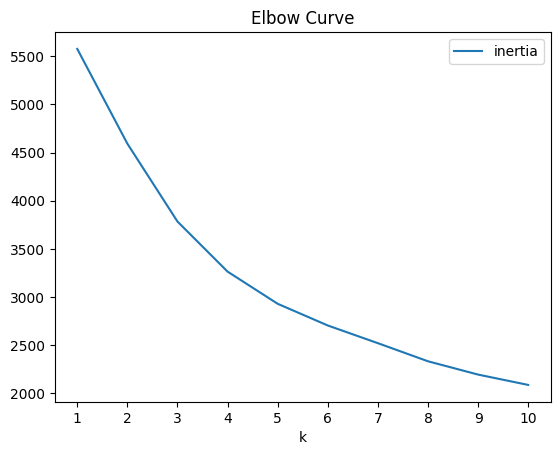

In [177]:
# Plot the DataFrame to identify the optimal value for k
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

Part 3: Segment the data with K-means using the optimal number of clusters

In [178]:
# Define the model with optimal number of clusters
model = KMeans(n_clusters=5, random_state=0)
# Fit the model
model.fit(df_technology_scaled)
# Make predictions
kmeans_predictions = model.predict(df_technology_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [152]:
kmeans_predictions[-10:]

array([3, 1, 1, 0, 4, 0, 4, 4, 4, 3], dtype=int32)

Part 4. Cluster the data using AgglomerativeClustering and Birch

In [179]:
agglo_model = AgglomerativeClustering(n_clusters=5)
agglo_predictions = agglo_model.fit_predict(df_technology_scaled)

In [154]:
agglo_predictions[-10:]

array([2, 1, 1, 0, 0, 4, 0, 1, 1, 2])

In [180]:
birch_model = Birch(n_clusters=5)
birch_model.fit(df_technology_scaled)
birch_predictions = birch_model.predict(df_technology_scaled)

In [181]:
# Previewing the predicted customer classifcations for Birch
birch_predictions[-10:]

array([2, 0, 0, 2, 0, 1, 0, 0, 0, 4])

Part 5. Compare the cluster results from using Kmeans, AgglomerativeClustering, Birch

In [182]:
# Create a copy of the customers_df DataFrame
technology_predictions_df = df_technology_scaled.copy()
# Add class columns with the labels to the new DataFrame
technology_predictions_df["kmeans-segments"] = kmeans_predictions
technology_predictions_df["agglomerative-segments"] = agglo_predictions
technology_predictions_df["birch-segments"] = birch_predictions
technology_predictions_df[['kmeans-segments','agglomerative-segments', 'birch-segments']].head(3)

,kmeans-segments,agglomerative-segments,birch-segments
Countries,,,
Argentina,1,1,0
Bangladesh,4,2,4
Belarus,1,1,0


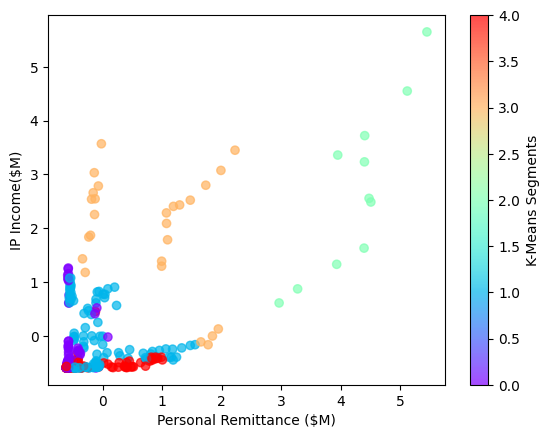

In [183]:
# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
plt.scatter(
    x=technology_predictions_df["Personal Remittance ($M)"],
    y=technology_predictions_df["IP Income($M)"],
    c=technology_predictions_df["kmeans-segments"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("Personal Remittance ($M)")
plt.ylabel("IP Income($M)")
plt.colorbar(label="K-Means Segments")

# Show the plot
plt.show()

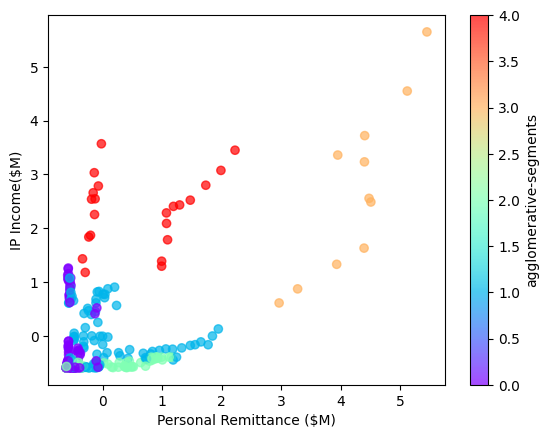

In [184]:
# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
plt.scatter(
    x=technology_predictions_df["Personal Remittance ($M)"],
    y=technology_predictions_df["IP Income($M)"],
    c=technology_predictions_df["agglomerative-segments"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("Personal Remittance ($M)")
plt.ylabel("IP Income($M)")
plt.colorbar(label="agglomerative-segments")

# Show the plot
plt.show()

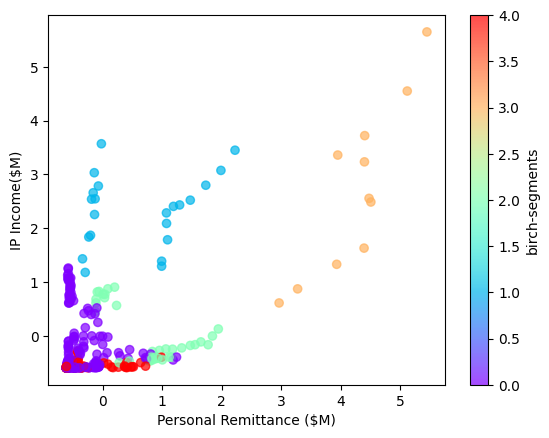

In [185]:
# Plot the birch clusters using the "feature_1" and "feature_2" columns
# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
plt.scatter(
    x=technology_predictions_df["Personal Remittance ($M)"],
    y=technology_predictions_df["IP Income($M)"],
    c=technology_predictions_df["birch-segments"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("Personal Remittance ($M)")
plt.ylabel("IP Income($M)")
plt.colorbar(label="birch-segments")

# Show the plot
plt.show()

In [186]:
technology_predictions_df[['kmeans-segments','agglomerative-segments', 'birch-segments']].corr()

,kmeans-segments,agglomerative-segments,birch-segments
kmeans-segments,1.000000,0.606570,0.785411
agglomerative-segments,0.606570,1.000000,0.513175
birch-segments,0.785411,0.513175,1.000000


Part 6: Reduce the number of features to two principal components on the df_stocks_scaled DataFrame, and calculate the explained variance ratio that results from the PCA data.

In [187]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=6)

In [188]:
# Fit the df_stocks_scaled data to the PCA
tech_pca_data = pca.fit_transform(df_technology_scaled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
tech_pca_data[:5]

array([[-0.50095051,  0.04702712, -0.73316725, -1.02752741, -0.63303193,
        -0.90601527],
       [ 2.57702189, -3.26639113, -1.28551719, -1.34922294,  0.8112477 ,
         1.49085067],
       [-0.70290824,  0.02342228, -1.42775365,  0.04245144, -1.07810804,
        -1.17928107],
       [ 0.36776176, -0.45650705,  0.14070777,  0.61535456,  0.1416556 ,
        -0.68538077],
       [-0.73739974, -0.58997983, -2.09752457,  0.02107079,  0.59887239,
        -0.14323667]])

In [189]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.24964674, 0.23843978, 0.0839197 , 0.06989996, 0.06631387,
       0.05919684])

In [190]:
import numpy as np
# Fit the PCA model to your data
pca.fit(df_technology_scaled)
# Get the loadings (coefficients) for each feature
loadings = pca.components_
# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)
# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)
# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = df_technology_scaled.columns[feature_idx]
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is Personal Remittance ($M)
Component 2: Most important feature is IP Income($M)
Component 3: Most important feature is High Tech Import
Component 4: Most important feature is Poverty Count
Component 5: Most important feature is Unemployment Rate
Component 6: Most important feature is Poverty Count


Part 7: Use the calculate PCA DataFrame in Step 6 to create a new DataFrame called, then add an additional column to the DataFrame that contains the tickers from the originalDataFrame.

In [130]:
# Creating a DataFrame with the PCA data
df_technology_pca = pd.DataFrame(tech_pca_data, columns=["PC1", "PC2","PC3","PC4","PC5"])
# Copy the tickers names from the original data
df_technology_pca["Countries"] = df_technology.index
# Set the Ticker column as index
df_technology_pca = df_technology_pca.set_index("Countries")
# Review the DataFrame
df_technology_pca.head()

,PC1,PC2,PC3,PC4,PC5
Countries,,,,,
Argentina,-0.500951,0.047027,-0.733167,-1.027527,-0.633032
Bangladesh,2.577022,-3.266391,-1.285517,-1.349223,0.811248
Belarus,-0.702908,0.023422,-1.427754,0.042451,-1.078108
Colombia,0.367762,-0.456507,0.140708,0.615355,0.141656
Costa Rica,-0.737400,-0.589980,-2.097525,0.021071,0.598872


Part 8: Two principal components for the x- and y-axes. Be sure to style and format your plot.

In [131]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=5)
# Fit the model for the df_stocks_pca DataFrame
model.fit(df_technology_pca)
# Predict the model segments (clusters)
tech_clusters = model.predict(df_technology_pca)
# Print the stock segments
print(tech_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 4 2 3 3 4 3 4 1 4 3 2 4 4 0 2 3 4 4 4 2 4 4 3 0 3 3 3 3 4 2 4 2 3 2 4 4
 4 1 4 3 2 4 2 0 2 3 3 4 4 2 4 4 3 0 3 3 3 3 4 2 4 2 3 2 4 3 4 1 4 3 2 4 3
 0 2 3 4 4 4 2 4 0 3 0 3 3 2 3 4 2 4 2 3 2 4 3 4 1 4 3 2 4 3 0 2 3 3 4 4 2
 4 0 3 0 3 3 2 3 4 2 4 2 2 2 4 3 4 1 4 3 2 4 3 0 2 4 3 4 4 2 4 0 3 0 3 3 2
 3 4 2 4 2 2 2 4 3 4 1 4 3 2 4 3 0 2 3 3 4 4 2 0 3 0 3 2 3 3 4 2 4 2 2 2 4
 3 4 1 4 3 2 4 3 0 2 3 3 4 4 2 2 0 3 0 3 2 2 3 4 2 4 2 2 2 4 3 4 1 3 3 2 4
 3 0 2 3 3 4 4 2 2 0 3 0 3 2 2 3 4 2 4 2 2 2 4 3 4 1 4 3 2 4 3 0 2 3 3 4 4
 2 2 0 3 0 3 2 2 3 4 2 4 2 2 2 4 3 4 1 3 3 2 4 3 0 2 3 3 4 4 2 2 0 3 0 3 2
 2 3 4 2 4 2 2 2 4 3 4 1 3 3 2 4 3 0 2 3 3 3 4 2 2 0 3 0 3 2 3 4]


In [132]:
# Create a copy of the DataFrame and name it as df_stocks_pca_predictions
df_tech_pca_predictions = df_technology_pca.copy()
# Create a new column in the DataFrame with the predicted clusters
df_tech_pca_predictions["TechCluster"] = tech_clusters
# Review the DataFrame
df_tech_pca_predictions.head()

,PC1,PC2,PC3,PC4,PC5,TechCluster
Countries,,,,,,
Argentina,-0.500951,0.047027,-0.733167,-1.027527,-0.633032,2
Bangladesh,2.577022,-3.266391,-1.285517,-1.349223,0.811248,4
Belarus,-0.702908,0.023422,-1.427754,0.042451,-1.078108,2
Colombia,0.367762,-0.456507,0.140708,0.615355,0.141656,3
Costa Rica,-0.737400,-0.589980,-2.097525,0.021071,0.598872,3


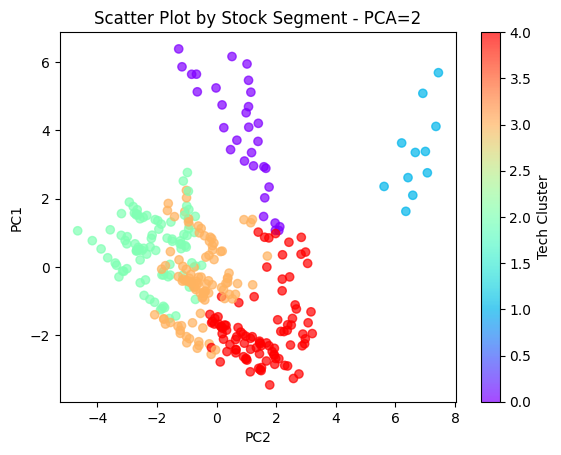

In [134]:
# Create the scatter plot with x="PC1" and y="PC2"
# Create a scatter plot with different colors for each cluster
plt.scatter(
    x=df_tech_pca_predictions["PC1"],
    y=df_tech_pca_predictions["PC2"],
    c=df_tech_pca_predictions["TechCluster"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.colorbar(label="Tech Cluster")

# Add the title
plt.title("Scatter Plot by Stock Segment - PCA=2")

# Show the plot
plt.show()